In [64]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [65]:
from google.colab import files
uploaded = files.upload()

Saving height-weight.csv to height-weight (1).csv


In [66]:
# load dataset
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Height vs Weight')

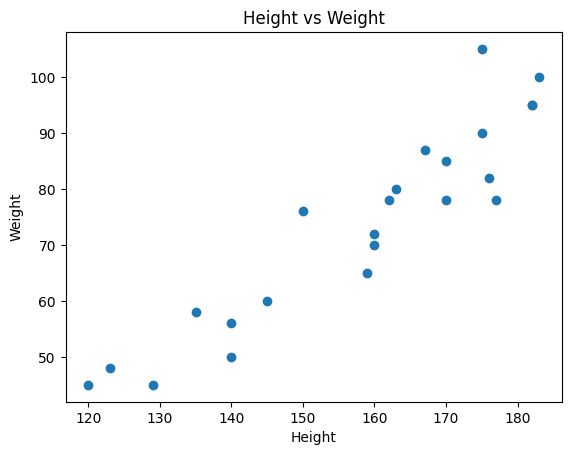

In [67]:
# visualize the dataset
plt.scatter(df['Height'],df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

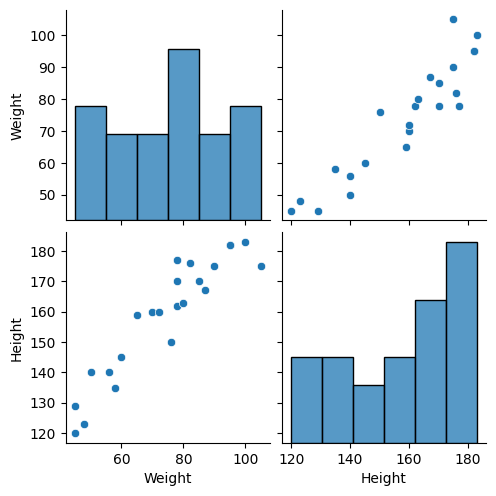

In [68]:
sns.pairplot(df)

In [69]:
# check data correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [70]:
X = df[['Weight']] #independent feature (2d)
y = df['Height'] # dependent feature

In [71]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [72]:
# standardization of dataset or scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [83]:
# applying Linear Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [84]:
# printing the slope and intercept
print(model.coef_)
print(model.intercept_)

[17.2982057]
156.47058823529412


Text(0.5, 1.0, 'Height vs Weight')

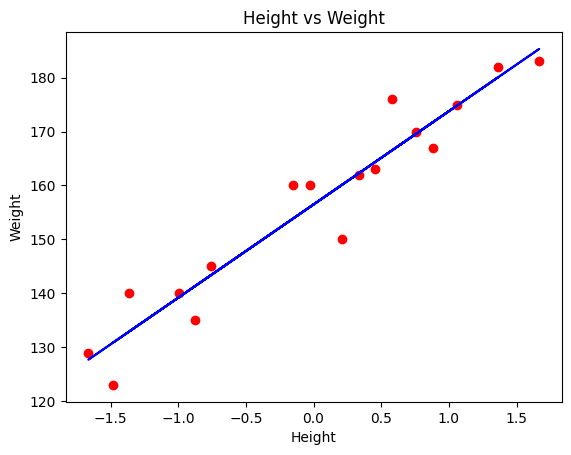

In [85]:
# visualize the model prediction based on training data
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [86]:
#prediction for test data
y_pred=model.predict(X_test)

Text(0.5, 1.0, 'Height vs Weight')

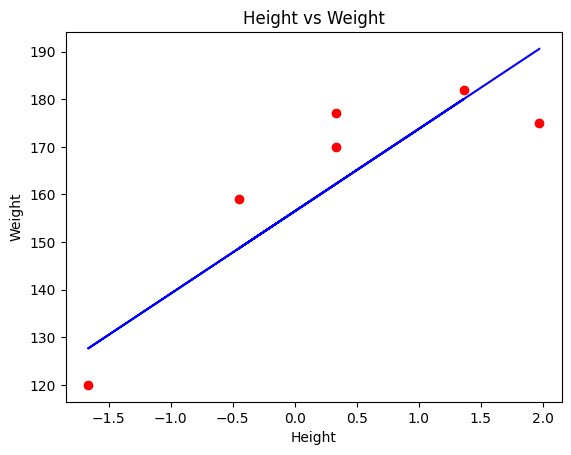

In [87]:
# visualize the model prediction based on test data
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, y_pred, color='blue')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')

In [78]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:', mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 Score:', r2_score(y_test,y_pred))

# Adjusted R2 Score
print('Adjusted R2 Score:', 1 - (1-r2_score(y_test,y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

MAE: 9.66512588679501
MSE: 114.84069295228699
RMSE: 10.716374991212605
R2 Score: 0.7360826717981276
Adjusted R2 Score: 0.6701033397476595


In [91]:
# OLS Linear Regression
import statsmodels.api as sm

#train model
model_ols=sm.OLS(y_train, X_train).fit()
prediction=model_ols.predict(X_test)
print(prediction)
print(model_ols.summary())

[162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]
                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     174.5
Date:                Tue, 01 Jul 2025   Prob (F-statistic):           1.15e-09
Time:                        16:45:42   Log-Likelihood:                -51.726
No. Observations:                  17   AIC:                             107.5
Df Residuals:                      15   BIC:                             109.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [93]:
#Calculating Adjusted R2 Score Directly Using "statsmodel.api"

#add constant (intercept)
X_train_sm = sm.add_constant(X_train)

#train model
ols_model = sm.OLS(y_train, X_train_sm).fit()
print("Adjusted R2 Score:", ols_model.rsquared_adj)

Adjusted R2 Score: 0.9155506607677264
